In [70]:
import numpy as np
from numpy.linalg.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.markers import MarkerStyle
import cartopy.crs as ccrs
import cartopy.feature as cfeaturel
import pandas as pd

# データの読み込み os.path.join を用いる

lt_0 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_0day.npz'
lt_1 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_1day.npz'
lt_3 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_3day.npz'
lt_5 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_5day.npz'
lt_10 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_10day.npz'
lt_15 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_15day.npz'
lt_20 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_20day.npz'
lt_25 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_25day.npz'
lt_30 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_30day.npz'
lt_35 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_35day.npz'

df_0 = np.load(lt_0)
df_1 = np.load(lt_1)
df_3 = np.load(lt_3)
df_5 = np.load(lt_5)
df_10 = np.load(lt_10)
df_15 = np.load(lt_15)
df_20 = np.load(lt_20)
df_25 = np.load(lt_25)
df_30 = np.load(lt_30)
df_35 = np.load(lt_35)


In [72]:
df_box = [df_0, df_1, df_3, df_5, df_10, df_15, df_20, df_25, df_30, df_35]
pred = []
sup  = []
for data in df_box:
    pred_i = data['arr_0']
    sup_i = data['arr_1']
    pred.append(pred_i)
    sup.append(sup_i)
    print('pred, sup = ', pred_i.shape, sup_i.shape)

pred, sup =  (2486, 2) (2486, 2)
pred, sup =  (2485, 2) (2485, 2)
pred, sup =  (2483, 2) (2483, 2)
pred, sup =  (2481, 2) (2481, 2)
pred, sup =  (2476, 2) (2476, 2)
pred, sup =  (2471, 2) (2471, 2)
pred, sup =  (2466, 2) (2466, 2)
pred, sup =  (2461, 2) (2461, 2)
pred, sup =  (2456, 2) (2456, 2)
pred, sup =  (2451, 2) (2451, 2)


In [73]:
# 相関係数の計算
def culc_cor(test_data, pred_data):
    j = 0
    cor = (np.sum(pred_data[:,2*j] * test_data[:,2*j], axis=0) + np.sum(pred_data[:,2*j+1] * test_data[:,2*j+1], axis=0)) / \
            (np.sqrt(np.sum(pred_data[:,2*j] ** 2 + pred_data[:,2*j+1] ** 2, axis=0)) * np.sqrt(np.sum(test_data[:,2*j] ** 2 + test_data[:,2*j+1] ** 2, axis=0)))
    #print('cor : = ', cor)
    return cor

In [74]:
lead_time = [0, 1, 3, 5, 10, 15, 20, 25, 30, 35]
cor = np.zeros((len(lead_time), 5))
for i in range(len(pred)):
    rt = pd.date_range('2015-01-01', periods=len(pred[i]), freq='D')    # real time のインデックスは'与えるデータの初期時刻'で定めておく
    
    jja = jja = rt.month.isin([6, 7, 8])
    djf = rt.month.isin([12, 1, 2])
    mjjaso = rt.month.isin([5, 6, 7, 8, 9, 10])
    ndjfma = rt.month.isin([11, 12, 1, 2, 3, 4])
    pred_jja     = pred[i][jja]
    pred_djf     = pred[i][djf]
    pred_mjjaso  = pred[i][mjjaso]
    pred_ndjfma  = pred[i][ndjfma]
    sup_jja      = sup[i][jja]
    sup_djf      = sup[i][djf]
    sup_mjjaso   = sup[i][mjjaso]
    sup_ndjfma   = sup[i][ndjfma]
    print('=== lead time : {} day ==='.format(lead_time[i]))
    cor[i, 0]   = culc_cor(sup_jja, pred_jja)
    cor[i, 1]   = culc_cor(sup_djf, pred_djf)
    cor[i, 2]   = culc_cor(sup_mjjaso, pred_mjjaso)
    cor[i, 3]   = culc_cor(sup_ndjfma, pred_ndjfma)
    cor[i, 4]   = culc_cor(sup[i], pred[i])
print('jja, djf, mjjaso, ndjfma, all')
print(cor)

=== lead time : 0 day ===
=== lead time : 1 day ===
=== lead time : 3 day ===
=== lead time : 5 day ===
=== lead time : 10 day ===
=== lead time : 15 day ===
=== lead time : 20 day ===
=== lead time : 25 day ===
=== lead time : 30 day ===
=== lead time : 35 day ===
jja, djf, mjjaso, ndjfma, all
[[0.94280845 0.85246654 0.92272197 0.86771823 0.90506729]
 [0.94387749 0.87039284 0.9250914  0.87813135 0.91024591]
 [0.93925297 0.87536287 0.92013695 0.8787622  0.90727576]
 [0.92488935 0.84792154 0.90085545 0.86108776 0.88814191]
 [0.8805689  0.76705948 0.85043332 0.76793077 0.82407766]
 [0.79580283 0.63279121 0.74524018 0.62391702 0.70684506]
 [0.71452347 0.49347306 0.66804278 0.4825113  0.60418536]
 [0.6630919  0.44742722 0.58833064 0.4013359  0.52245413]
 [0.54457204 0.3476023  0.47264944 0.31029801 0.41260138]
 [0.41418804 0.2922906  0.35282185 0.25091797 0.31804652]]


In [75]:
cor_mm = np.zeros((len(lead_time),12))
for i in range(len(pred)):
    rt = pd.date_range('2015-01-01', periods=len(pred[i]), freq='D')    # real time のインデックスは'与えるデータの初期時刻'で定めておく
    for m in range(1, 13):
        mm = rt.month == m
        pred_m          = pred[i][mm]
        sup_m           = sup[i][mm]
        cor_mm[i, m-1]  = culc_cor(sup_m, pred_m)

print(cor_mm)

[[0.847596   0.80777109 0.84597419 0.85963389 0.9157701  0.94957841
  0.95753849 0.91207792 0.84886994 0.91160138 0.90816222 0.89232055]
 [0.85839766 0.81686652 0.86282019 0.88411918 0.92321693 0.94948357
  0.95630051 0.91683858 0.8516954  0.9121247  0.89965168 0.92399052]
 [0.87423655 0.82028408 0.86579925 0.88667418 0.91781003 0.95570616
  0.95000496 0.8994681  0.85430452 0.90721856 0.89168694 0.91865911]
 [0.82928229 0.7944147  0.83884858 0.87957716 0.86837011 0.93837765
  0.94326146 0.87443335 0.84300469 0.89393352 0.89500048 0.90663575]
 [0.73667667 0.7259962  0.73875526 0.77745252 0.78660431 0.89004569
  0.89604997 0.83517749 0.79636005 0.84159117 0.79133145 0.82594243]
 [0.52061812 0.67136262 0.56140629 0.63105993 0.63238915 0.81156145
  0.80974874 0.75754345 0.67564    0.72653572 0.644077   0.7173048 ]
 [0.41175506 0.51531256 0.50771242 0.52994635 0.60491949 0.76226783
  0.70798037 0.656399   0.54488947 0.64728248 0.4034683  0.56725397]
 [0.31943035 0.49155527 0.45655998 0.3880

[ 1  2  3  4  5  6  7  8  9 10 11 12]


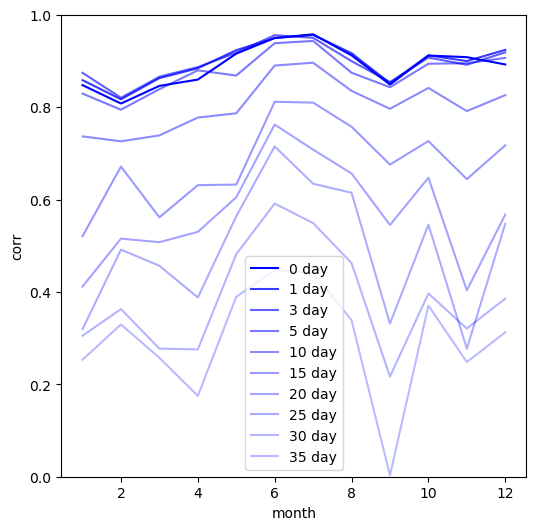

In [78]:
x_month = np.arange(1, 13)
print(x_month)
plt.figure(figsize=(6, 6))
for j in range(len(lead_time)):
    plt.plot(x_month, cor_mm[j,:], color='b', alpha=1/(j*.3+1), label='{} day'.format(lead_time[j]))  
plt.ylim(0.0,1.0)
plt.xlabel('month')
plt.ylabel('corr')
plt.legend()

In [94]:
nicam_bsiso = np.array([
    [0.6145144, 0.9919250],
    [0.1220745, 0.9920530],
    [1.3663927, 0.9862836],
    [2.1182138, 0.9798000],
    [2.8703655, 0.9781713],
    [3.6222251, 0.9722551],
    [4.3740378, 0.9656494],
    [5.1258372, 0.9588480],
    [5.8775442, 0.9506906],
    [6.6293278, 0.9436571],
    [7.3810713, 0.9360362],
    [8.1326835, 0.9264866],
    [8.8840872, 0.9138771],
    [9.6354934, 0.9013038],
    [10.3868744, 0.888360],
    [11.1382741, 0.875693],
    [11.8897835, 0.864635],
    [12.6411853, 0.8519968],
    [13.3922926, 0.8350366],
    [14.1431426, 0.8142987],
    [14.8939842, 0.7934375],
    [15.6448970, 0.7736204],
    [16.3958043, 0.7537236],
    [17.1467724, 0.7347187],
    [17.8979889, 0.7193610],
    [18.6494207, 0.7071647],
    [19.4007518, 0.6934893],
    [20.1520385, 0.6791613],
    [20.9035726, 0.6684660],
    [21.6550534, 0.6569876],
    [22.4061780, 0.6402813],
    [23.1569510, 0.6184123],
    [23.9078067, 0.5977576],
    [24.7032303, 0.5829329],
    [25.4095400, 0.5567711],
    [26.1602745, 0.5343365],
    [26.8743596, 0.5125842],
    [27.4597305, 0.4867337],
    [28.0817463, 0.4601367],
    [28.7504060, 0.4449050]
])

# MJO skill scores of NICAM (Miyakawa+13)
# 2008-2012年の各１１月～３月の結果
# 水平解像度は１４km
nicam_mjo = np.array([
    [1.5462208206076005, 0.9812175237750825],
    [2.471175961112099, 0.9650189502864384],
    [3.3961311016165974, 0.9537185887268789],
    [4.321086242121097, 0.9398692413707002],
    [5.246041382625594, 0.9295024036275322],
    [6.170996523130094, 0.9149337246728477],
    [7.095951663634593, 0.8964731763992999],
    [8.020906804139091, 0.8851075403353617],
    [8.945861944643589, 0.8751195571276585],
    [9.870817085148087, 0.8573822766036338],
    [10.795772225652588, 0.8371307796169803],
    [11.720727366157085, 0.8184980247364029],
    [12.645682506661583, 0.81384844634661],
    [13.570637647166084, 0.8121263802763163],
    [14.495592787670581, 0.8023794863184543],
    [15.420547928175079, 0.7860198586506645],
    [16.34550306867958, 0.7703834987323981],
    [17.270458209184078, 0.7581568296333131],
    [18.195413349688575, 0.7461023671412574],
    [19.120368490193073, 0.7353222335412192],
    [20.045323630697574, 0.714760764661913],
    [20.97027877120207, 0.6907896049634251],
    [21.89523391170657, 0.6809566077020484],
    [22.82018905221107, 0.6907617259437944],
    [23.745144192715568, 0.6886890144203301],
    [24.670099333220065, 0.6651652618374555],
    [25.595054473724563, 0.6313622529216377],
    [26.520009614229064, 0.6115917863906195],
    [27.490868235651895, 0.592994267631173],
    [28.369919895238063, 0.5541756981814071],
    [29.25011914184718, 0.4856055535449536],
    [30.130318388456303, 0.43786084747740284],
])

cnn_bp = np.array([
    [0,  0.9925489267970012],
    [2,  0.9921619014788010],
    [4,  0.9917982369942809],
    [6,  0.9876011011358417],
    [8,  0.9833260673707259],
    [10, 0.9730582619096018],
    [15, 0.9177067088356041],
    [20, 0.8716005416467286],
    [25, 0.8185876235392283],
    [30, 0.7388985175180534],
    [35, 0.5458392483160485],
    [40, 0.4060880564285142]

])

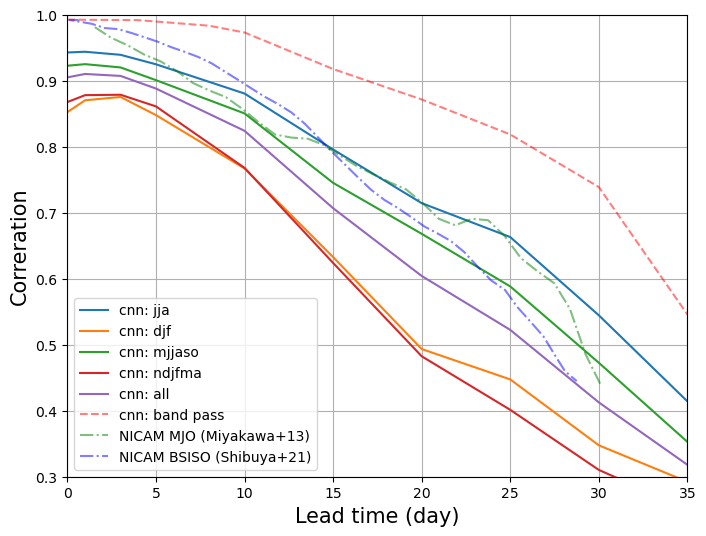

In [104]:
# リードタイムごとの予測スキルの比較
label_box = ['cnn: jja', 'cnn: djf', 'cnn: mjjaso', 'cnn: ndjfma', 'cnn: all']
plt.figure(figsize=(8,6))
for j in range(5):
    plt.plot(lead_time, cor[:,j], label=label_box[j])
plt.plot(cnn_bp[:,0], cnn_bp[:,1], label='cnn: band pass', color='r', linestyle='--', alpha=0.5)
plt.plot(nicam_mjo[:,0], nicam_mjo[:,1], label='NICAM MJO (Miyakawa+13)', color='g', linestyle='-.', alpha=0.5)
plt.plot(nicam_bsiso[:,0], nicam_bsiso[:,1], linestyle='-.', color='b', label='NICAM BSISO (Shibuya+21)', alpha=0.5)
plt.xlim(0,35)
plt.ylim(0.3,1.0)
plt.xlabel('Lead time (day)', fontsize=15)
plt.ylabel('Correration', fontsize=15)
plt.grid()
plt.legend()